In [ ]:
#Chn2Pyr testing

In [1]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [ ]:
#do not rerun
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
#fileList = ['class_pyramidalcell_original_modified.hoc','class_axoaxoniccell.hoc']
fileList = ['class_pyramidalcell.hoc','class_axoaxoniccell.hoc']
#fileList = ['class_pyramidalcell.hoc']
#for each file, load it into the hoc interpreter so it can be accessed
for item in fileList:
    h.load_file(os.path.join("biophys_components/templates/",item))
callNames = ["h." + fileList[i].split('_')[1].split('.')[0] + "()" for i in range(len(fileList))]
callNames.sort()

for i in range(len(callNames)):
    myCell = eval(callNames[i])
#    for sec in h.allsec(myCell):
#        print(sec)

In [ ]:

AxonNo = 6
#InjList = [np.arange(400,500,50),#aac
#          np.arange(200,550,50)]#pyr
a = 200
InjList = [np.array([200]),np.array([a])]
allTrials = []
allTrialsVas = []
#allTrialsiNasoma = []
for i in range(len(callNames)):
    myCell = eval(callNames[i])#make the cell
    Ia = InjList[i] /1000# nA ->pA# the current sweep for this particular cell
    allVs = []
    allVas = []
    #alliNasoma = []
    for j in range(len(Ia)):#test it at each current injection and save       
        #iclamp = h.IClamp(myCell.axon[AxonNo](0.5))
        iclamp = h.IClamp(myCell.soma[0](0.5))
        iclamp.delay = 300
        iclamp.dur = 2
        iclamp.amp = Ia[j]
        
        v = h.Vector().record(myCell.soma[0](0.5)._ref_v)
        #va = h.Vector().record(myCell.axon[0](0.5)._ref_v)
        #iNasoma = h.Vector().record(myCell.soma[0](0.5)._ref_ina)
        
        h.dt=0.2
        h.finitialize(-63)
        h.continuerun(1500)
        
        #iNaSoma = np.array(iNasoma)
        V = np.array(v)
        #Va = np.array(va)
        
        
        allVs.append(V)
        #allVas.append(Va)
        #alliNasoma.append(iNasoma)
        
    allTrials.append([allVs])#list of lists; each sublist has the current sweeps for the given cell
    #allTrialsVas.append([allVas])
    #allTrialsiNasoma.append([alliNasoma])
    
res = np.concatenate(allTrials,axis=1)[0].T#how I plotted it the first time.
#resVa = np.concatenate(allTrialsVas,axis=1)[0].T#how I plotted it the first time.
#resIna =  np.concatenate(allTrialsiNasoma,axis=1)[0].T#how I plotted it the first time.

time = np.arange(0,res.shape[0]*h.dt/1000,h.dt/1000)#time in seconds


"""
start = 0
fig,axs = plt.subplots(1,2,figsize=(15,4))
axs[0].plot(time[:5850],res[:5850,start:start+len(InjList[1])])
axs[0].set_title('pyramidal cell Soma')
axs[0].set_xlim([0.25, 0.35])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Potential (mV)')

axs[1].plot(time[:5850],resVa[:5850,start:start+len(InjList[1])])
axs[1].set_xlim([0.25, 0.35])
axs[1].set_title('pyramidal cell axon')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Potential (mV)')


plt.show()


"""
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.5)
start,k = 0,0
for j in range(2):
    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])
    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])
    axs[j].set_xlabel('Time (s)')
    axs[j].set_ylabel('Potential (mV)')
    start += len(InjList[k])

    k+=1

#plt.savefig('current sweeps.png',dpi=500)

In [ ]:
callNames

In [ ]:
dir(syn)

# The Synapse

In [2]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
h.load_file(os.path.join("biophys_components/templates/",'class_pyramidalcell.hoc'))
h.load_file(os.path.join("biophys_components/templates/",'class_axoaxoniccell.hoc'))

1.0

In [ ]:
from neuron import h

# setup for three simulations
s1 = h.Section(name='s1')
s2 = h.Section(name='s2')
s3 = h.Section(name='s3')

for sec in [s1, s2, s3]:
    sec.insert('hh')
    sec.L = sec.diam = 3

c1 = h.IClamp(s1(0.5))
c2 = h.SEClamp(s2(0.5))
c3 = h.VClamp(s3(0.5))
c1.dur = 0.1
c1.amp = 0.3
c2.dur1 = 1
c2.rs = 0.01
c3.dur[0] = 1

# record an action potential
ap = h.Vector()
ap.record(s1(0.5)._ref_v)
h.finitialize(-65)
while h.t < 1:
    h.fadvance()

# do the three cases while playing the recorder ap
apc = ap.c() # unfortunately, cannot play into two variables, so clone it
ap.play_remove()
ap.play(c2._ref_amp1, h.dt)
apc.play(c3._ref_amp[0], h.dt)
h.finitialize(-65)


In [ ]:
Pyr = h.pyramidalcell()
AAC = h.axoaxoniccell()

iclamp = h.IClamp(AAC.soma[0](0.5))
iclamp.delay = 100
iclamp.dur = 15
iclamp.amp = 0.3

vclamp = h.SEClamp(Pyr.soma[0](0.5))
vclamp.dur = 1
vclamp.rs = 0.01

vPyr = h.Vector().record(Pyr.soma[0](0.5)._ref_v)
vPyrAxon = h.Vector().record(Pyr.axon[6](0.5)._ref_v)
vAAC = h.Vector().record(AAC.soma[0](0.5)._ref_v)

syn = h.chn2pyr(Pyr.axon[6](0.5))
#syn = h.ExpGABAab(Pyr.axon[6](0.5))
syn.AlphaTmax_gaba = 1.52
syn.Beta_gaba = 0.14
syn.Cdur_gaba = 0.7254
syn.gbar_gaba = 0.006
syn.Erev_gaba = -50
syn.initW =2
syn.lambda1 = 1
syn.lambda2 = 0.01
syn.threshold1 = 0.5
syn.threshold2 = 0.6
syn.tauD1 = 40
syn.d1 = 0.95
syn.tauD2 = 70
syn.d2 = 0.9
syn.tauF = 20
syn.f = 0

isyn = h.Vector().record(syn._ref_igaba)
#isyn= h.Vector().record(syn._ref_i)
netcon = h.NetCon(AAC.soma[0](0.5)._ref_v, syn,10, 0.8, 1,sec=AAC.soma[0])

h.dt=0.1
h.L = 20
h.finitialize(-63)
h.continuerun(300)

vPyr = np.array(vPyr)
vAAC = np.array(vAAC)
isyn = np.array(isyn)

In [ ]:
plt.plot(vAAC)

In [ ]:
plt.plot(vPyr,label = 'soma')
plt.plot(vPyrAxon,label='axon')

plt.legend()

In [ ]:
plt.plot(isyn)
plt.xlim([1000,1300])
plt.ylim([-0.1,0.1])

In [ ]:
secList = []
for sec in h.allsec(Pyr):
    #print(sec)
    for seg in sec.allseg():
        secList.append(seg)
        print(seg)
secList = [str(item) for item in secList]


In [ ]:
secList = secList[:secList.index('axoaxoniccell[0].soma[0](0)')]
#secList.index('pyramidalcell[1].axon[6](0.5)')

In [ ]:
secList

In [ ]:
count = 0
for i in secList:
    if '(1)' in i:
        if 'axon' not in i:
            count+=1
count

In [83]:
Pyr.all.printnames()

pyramidalcell[27].soma[0]
pyramidalcell[27].axon[0]
pyramidalcell[27].axon[1]
pyramidalcell[27].axon[2]
pyramidalcell[27].axon[3]
pyramidalcell[27].axon[4]
pyramidalcell[27].axon[5]
pyramidalcell[27].axon[6]
pyramidalcell[27].axon[7]
pyramidalcell[27].axon[8]
pyramidalcell[27].axon[9]
pyramidalcell[27].axon[10]
pyramidalcell[27].axon[11]
pyramidalcell[27].apical[0]
pyramidalcell[27].apical[1]
pyramidalcell[27].apical[2]
pyramidalcell[27].apical[3]
pyramidalcell[27].apical[4]
pyramidalcell[27].apical[5]
pyramidalcell[27].apical[6]
pyramidalcell[27].apical[7]
pyramidalcell[27].apical[8]
pyramidalcell[27].basal[0]
pyramidalcell[27].basal[1]
pyramidalcell[27].basal[2]
pyramidalcell[27].basal[3]


1.0

In [91]:
Pyr.soma[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3.571428571428572e-05],
   'e': [-63.0],
   'i': [6.07443267347446e-05]},
  'ch_HCNp': {'e': [-30.0],
   'gmax': [0.0006],
   'vhalfl': [-82.0],
   'i': [-0.0007862481362021814],
   'myi': [-0.0007862481362021814],
   'g': [2.5120423840602053e-05],
   'l': [0.041867441643663475]},
  'ch_Kdrp': {'e': [0.0],
   'gmax': [0.003],
   'myi': [1.897284321399818e-05],
   'g': [6.610553020304636e-07],
   'n': [0.00022035175827553641]},
  'ch_KvAproxp': {'gmax': [0.008],
   'e': [0.0],
   'myi': [0.00016664987295502014],
   'g': [5.80644560528174e-06],
   'n': [0.0011239228637742284],
   'l': [0.6457789761004049]},
  'ch_Navp': {'gmax': [0.032],
   'ar2': [1.0],
   'e': [0.0],
   'myi': [-5.142418250244492e-07],
   'g': [4.421715772522448e-09],
   'm': [0.005172281565960553],
   'h': [0.9986068470730196],
   's': [1.0]}},
 'ions': {'na': {'ena': [55.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [-5.142418250244492e-07],
   'dina_dv_':

In [92]:
Pyr.soma[0].gmax_ch_HCNp

0.0006

# test for facilitation

In [93]:
Pyr = h.pyramidalcell()
AAC = h.axoaxoniccell()

Pyr.soma[0].gmax_ch_HCNp = 0

iclamp = h.IClamp(Pyr.axon[6](0.5))
iclamp.delay = 100
iclamp.dur = 15
iclamp.amp = 0.3


vPyr = h.Vector().record(Pyr.soma[0](0.5)._ref_v)
vPyrAxon = h.Vector().record(Pyr.axon[6](0.5)._ref_v)
vAAC = h.Vector().record(AAC.soma[0](0.5)._ref_v)
vPyrapical = h.Vector().record(Pyr.apical[0](0.5)._ref_v)


syn = h.pyr2int(AAC.soma[0](0.5))
#syn = h.ExpGABAab(Pyr.axon[6](0.5))
syn.AlphaTmax_ampa =  10.157
syn.Beta_ampa = 0.4167
syn.Cdur_ampa = 0.713
syn.gbar_ampa =  0.001
syn.Erev_ampa = 0
syn.AlphaTmax_nmda = 0.2659
syn.Beta_nmda = 0.008
syn.Cdur_nmda = 16.7650#some kind of time constant
syn.gbar_nmda = 0.0005
syn.Erev_nmda = 0
syn.initW = 100
#syn.initW_lognormal_mean = 5
#syn.initW_lognormal_std = 1.2
syn.Wmax = 25
syn.Wmin = 0.25
#syn.delay = 0.8
#syn.con_pattern = 1
syn.lambda1 = 8
syn.lambda2 = 0.01
syn.threshold1 = 0.35
syn.threshold2 = 0.4
syn.tauD1 = 4#40
syn.d1 = 0.95
syn.tauD2 = 1#70
syn.d2 = 0.9
syn.tauF = 5#45
syn.f = 1
syn.bACH = 0
syn.aDA = 1
syn.bDA = 0
syn.wACH = 0
#syn.ratio = 0.05
#syn.gaussa = 0

iAMPA = h.Vector().record(syn._ref_i_ampa)
iNMDA = h.Vector().record(syn._ref_i_nmda)
#isyn= h.Vector().record(syn._ref_i)
netcon = h.NetCon(Pyr.apical[0](0.5)._ref_v, syn,10, 0.8, 10,sec=Pyr.apical[0])

h.dt=0.1
h.L = 20
h.finitialize(-63)
h.continuerun(300)

vPyr = np.array(vPyr)
vAAC = np.array(vAAC)
vPyrapical = np.array(vPyrapical)
iAMPA = np.array(iAMPA)
iNMDA = np.array(iNMDA)

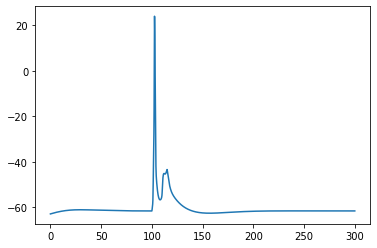

In [94]:
plt.plot(time,vPyrapical)

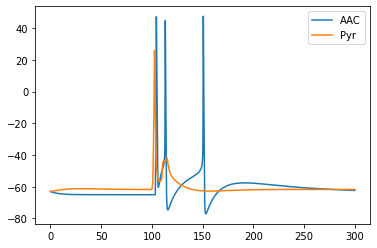

In [95]:
time = np.arange(0,300.1,0.1)
plt.plot(time,vAAC,label = 'AAC')
plt.plot(time,vPyr,label='Pyr')
plt.legend()


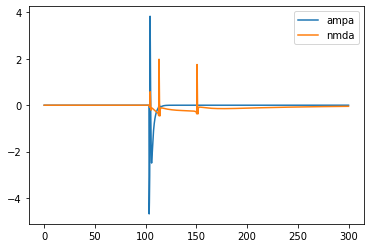

In [96]:
plt.plot(time,iAMPA,label = 'ampa')
plt.plot(time,iNMDA,label = 'nmda')
plt.legend()

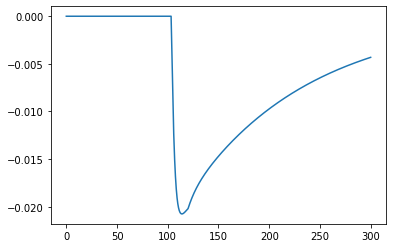

In [70]:
plt.plot(time,iNMDA)

In [ ]:
    "AlphaTmax_ampa": "10.1571",
    "Beta_ampa": "0.4167",
    "Cdur_ampa": "0.713",
    "gbar_ampa": "0.001",
    "Erev_ampa": "0",
    "AlphaTmax_nmda": "0.2659",
    "Beta_nmda": "0.008",
    "Cdur_nmda": "16.7650",
    "gbar_nmda": "0.0005",
    "Erev_nmda": "0",
    "initW": "1",
    "initW_lognormal_mean": 5,
    "initW_lognormal_std": 1.2,
    "Wmax": "25",
    "Wmin": "0.25",
    "delay": "0.8",
    "con_pattern": "1",
    "lambda1": "8",
    "lambda2": "0.01",
    "threshold1": "0.35",
    "threshold2": "0.4",
    "tauD1": "40",
    "d1": "0.95",
    "tauD2": "70",
    "d2": "0.9",
    "tauF": "45",
    "f": "1",
    "bACH": "0",
    "aDA": "1",
    "bDA": "0",
    "wACH": "0",
    "ratio": "0.05",
    "gaussa": "0"

# bmtk's synapse()

In [ ]:

m = 6#syn_params.get('initW_lognormal_mean')
s = 0#syn_params.get('initW_lognormal_std')
mean = np.log(m) - 0.5 * np.log((s/m)**2+1)
std = np.sqrt(np.log((s/m)**2 + 1))
log_weight = float(np.random.lognormal(mean,std, 1))
if log_weight >= float(5*m):
    log_weight = float(5*m)
float(log_weight) # par.x(0) * rC.uniform(0.5,1.0)//rand.normal(0.5,1.5) //`rand.repick()

In [ ]:
Pyr.NumBasal

In [ ]:
Pyr.NumSoma

In [ ]:
dir(Pyr)

In [ ]:
secList.index('pyramidalcell[0].axon[6](0.5)')

In [ ]:
Pyr.axon[6].psection()

In [ ]:
len(secList)

In [ ]:
secList.index('pyramidalcell[1].axon[6](0.5)')

In [ ]:
mt = h.MechanismType(0)
mt1 = h.MechanismType(1)

In [ ]:
mname  = h.ref('')
for i in range(mt1.count()):
    mt1.select(i)
    mt1.selected(mname)
    print(mname[0])

In [ ]:
mname  = h.ref('')
for i in range(mt.count()):
    mt.select(i)
    mt.selected(mname)
    print(mname[0])

In [ ]:
dir(mt)

# testing

In [ ]:
h.topology()

In [ ]:
myCell.soma[0].children()

In [ ]:
myCell.axon[0].psection()

In [ ]:
#AAC = eval(callNames[0])
Pyr = h.pyramidalcell()


In [ ]:
for item in Pyr.axon[0].allseg():
    print(item)

In [ ]:
channelDict = Pyr.axon[0].psection()

In [ ]:
channelDict['ions']['na']

In [ ]:
channelDict

In [ ]:
h.psection(sec = Pyr.axon[5])

In [ ]:
h.psection(sec = Pyr.soma[0])

In [ ]:
static int _ode_spec1 () {_reset=0;
 {
   DW = 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) * ( lambda1 * omega ( _threadargscomma_ capoolcon , threshold1 , threshold2 ) - lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) * W ) ;
   Dr_gaba = AlphaTmax_gaba * on_gaba * ( 1.0 - r_gaba ) - Beta_gaba * r_gaba ;
   Dcapoolcon = - fCag * Afactor * Icatotal + ( Cainf - capoolcon ) / tauCa ;
   }
 return _reset;
}
 static int _ode_matsol1 () {
 DW = DW  / (1. - dt*( ( 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) )*( ( ( - ( lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) )*( 1.0 ) ) ) ) )) ;
 Dr_gaba = Dr_gaba  / (1. - dt*( ( AlphaTmax_gaba * on_gaba )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ) )) ;
 Dcapoolcon = Dcapoolcon  / (1. - dt*( ( ( ( - 1.0 ) ) ) / tauCa )) ;
  return 0;
}
 /*END CVODE*/
 static int release () {_reset=0;
 {
    W = W + (1. - exp(dt*(( 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) )*( ( ( - ( lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) )*( 1.0 ) ) ) ))))*(- ( ( ( ( 1e-12 )*( limitW ) )*( eta ( _threadargscomma_ capoolcon ) ) )*( ( ( lambda1 )*( omega ( _threadargscomma_ capoolcon , threshold1 , threshold2 ) ) ) ) ) / ( ( ( ( 1e-12 )*( limitW ) )*( eta ( _threadargscomma_ capoolcon ) ) )*( ( ( - ( ( lambda2 )*( GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) ) )*( 1.0 ) ) ) ) ) - W) ;
    r_gaba = r_gaba + (1. - exp(dt*(( AlphaTmax_gaba * on_gaba )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ))))*(- ( ( ( AlphaTmax_gaba )*( on_gaba ) )*( ( 1.0 ) ) ) / ( ( ( AlphaTmax_gaba )*( on_gaba ) )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ) ) - r_gaba) ;
    capoolcon = capoolcon + (1. - exp(dt*(( ( ( - 1.0 ) ) ) / tauCa)))*(- ( ( ( - fCag )*( Afactor ) )*( Icatotal ) + ( ( Cainf ) ) / tauCa ) / ( ( ( ( - 1.0 ) ) ) / tauCa ) - capoolcon) ;
   }
  return 0;
}

In [ ]:
#using a synapse

In [ ]:
Pyr.axon[0](1).ri()

In [ ]:
Pyr.soma[0](1).ri()